In [1]:
#23BAI10355
#ANVESHA RASTOGI

In [2]:
import numpy as np
from collections import Counter

def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count/total) * np.log2(count/total) for count in counts.values())

def information_gain(y, x):
    # y: target, x: attribute values
    total = len(y)
    unique_vals = set(x)
    weighted_entropy = sum(
        (sum(xi == val for xi in x) / total) *
        entropy([yi for xi, yi in zip(x, y) if xi == val])
        for val in unique_vals
    )
    return entropy(y) - weighted_entropy

def majority_class(y):
    return Counter(y).most_common(1)[0][0]

def id3(X, y, features):
    if len(set(y)) == 1:
        return y[0]  # Single class left
    if not features:
        return majority_class(y)
    # Select feature with highest info gain
    gains = [information_gain(y, [x[feature] for x in X]) for feature in features]
    best_feature = features[np.argmax(gains)]
    tree = {best_feature: {}}
    unique_vals = set(x[best_feature] for x in X)
    for val in unique_vals:
        sub_X = [x for x in X if x[best_feature] == val]
        sub_y = [yi for x, yi in zip(X, y) if x[best_feature] == val]
        subtree = id3(
            sub_X,
            sub_y,
            [f for f in features if f != best_feature]
        )
        tree[best_feature][val] = subtree
    return tree

# Example dataset:
X = [
    {'Weather': 'Sunny', 'Temp': 'Hot'},
    {'Weather': 'Sunny', 'Temp': 'Cool'},
    {'Weather': 'Rain', 'Temp': 'Hot'},
    {'Weather': 'Rain', 'Temp': 'Cool'}
]
y = ['No', 'Yes', 'Yes', 'No']
features = ['Weather', 'Temp']

tree = id3(X, y, features)
print(tree)


{'Weather': {'Sunny': {'Temp': {'Hot': 'No', 'Cool': 'Yes'}}, 'Rain': {'Temp': {'Hot': 'Yes', 'Cool': 'No'}}}}


Prediction: setosa


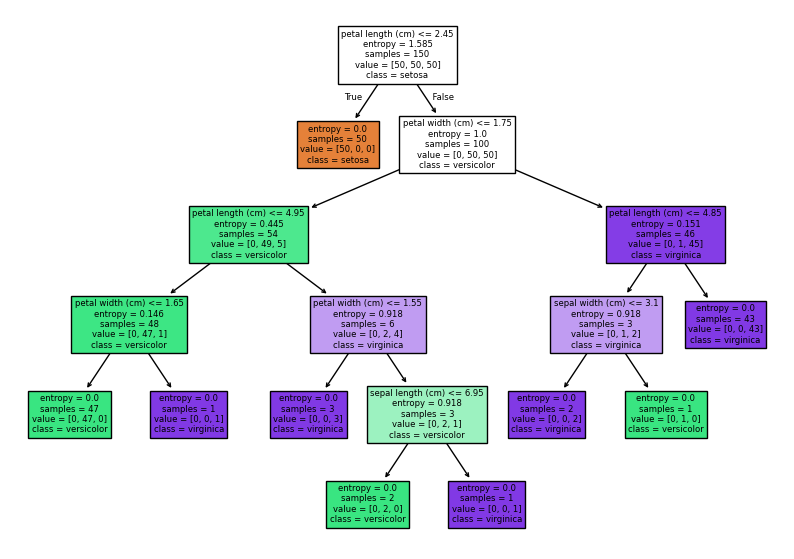

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset (Iris for demo)
iris = load_iris()
X, y = iris.data, iris.target

# Train decision tree
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 uses entropy (C4.5/CART may use 'gini')
clf.fit(X, y)

# Predict
pred = clf.predict([[5.1, 3.5, 1.4, 0.2]])
print("Prediction:", iris['target_names'][pred[0]])

# Visualize the tree
plt.figure(figsize=(10,7))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
